# A simple scientific plot with Python

* Random gaussian noise doc: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
* Matplotlib: https://matplotlib.org/stable/
* IpyWidgets interact: https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html

In [57]:
# Libraries
%matplotlib notebook
import numpy as np # Matlab like functions in Python
from matplotlib import pyplot as plt # Matplotlib: quality plotting with Python
import ipywidgets as ipw # GUI tools for Jupyter

In [37]:
# X data creation

# x = [1,2,3,4,5]
# x = np.array([1,2,3,4,5])
x = np.linspace(0., 10., 101)
#x

In [63]:
#  y function:

def func(x, a=1., v=1.e3, omega=2.*np.pi*1., phi = 0., sigma = 0.):
    """
    A mathematical function:
    
    Args:
    * x (float or array): x values
    * a: amplitude
    * v: characteritic time.
    * omega: pulsation
    * phi: phase
    * sigma: gaussian noise standard deviation
    
    Outputs:
    y: (array)
    """
    if sigma == 0.:
        noise = 0.
    else:
        noise = np.random.normal(scale = sigma, size = x.shape)
    return a * np.exp(- x / v) * np.sin(omega * x + phi) + noise

func(x, omega = 5.)

array([ 0.        ,  0.04997867,  0.09983142, ..., -0.35385082,
       -0.30719094, -0.25976418])

<IPython.core.display.Javascript object>


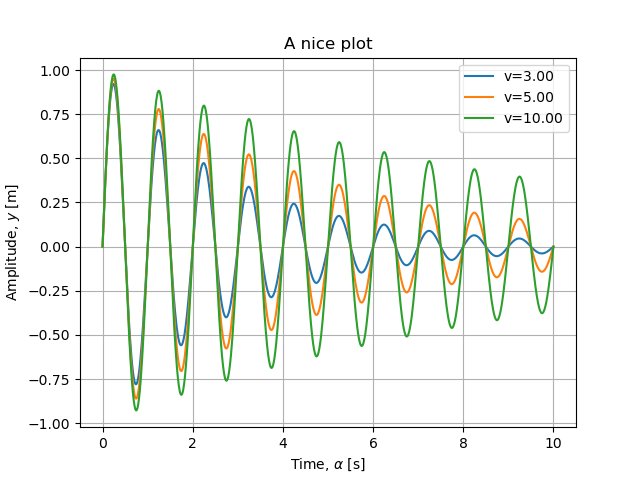

In [64]:
x = np.linspace(0., 10., 1001)
plt.figure()
for v in [3., 5., 10.]:
    plt.plot(x, func(x, v= v), label = "v={0:.2f}".format(v))
plt.xlabel("Time, $\\alpha$ [s]")
plt.ylabel("Amplitude, $y$ [m]")
plt.grid()
plt.title("A nice plot")
plt.legend(loc = "best")
plt.show()

## A more interactive plot with IPythonWidgets

/home/ludch/miniconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


<IPython.core.display.Javascript object>


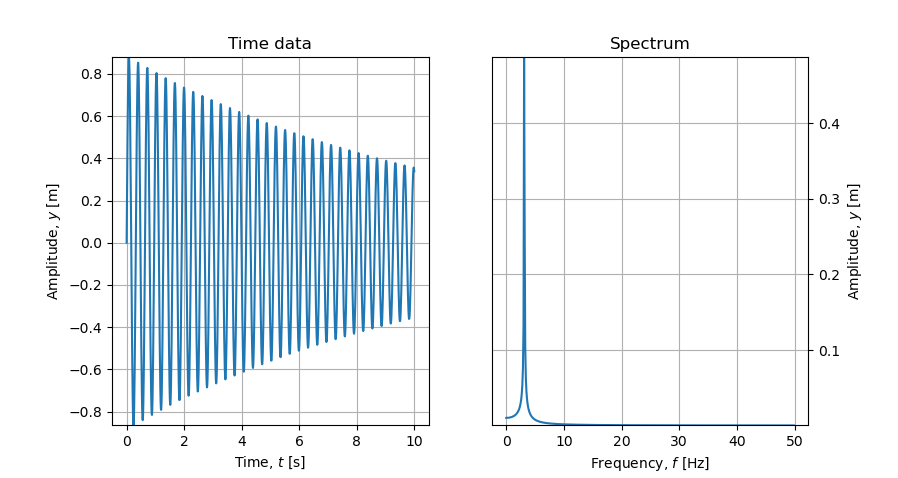

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, step=0.001), FloatSlider(value=100.0, d…

In [85]:
def spectrum(x, y):
    N = len(y) # Number of samples
    fs = (x[1] - x[0])**-1 # Sampling rate
    Y = np.fft.fft(y)
    amp = np.abs(Y[:N//2]) / (N/2)
    freq = np.linspace(0., fs / 2., N//2, endpoint = False)
    return freq, amp

x = np.linspace(0., 10., 1000)
y = func(x)
freq, amp = spectrum(x, y)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
line, = plt.plot(x, y)
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $y$ [m]")
plt.grid()
plt.title("Time data")

ax2 = fig.add_subplot(1,2,2)
line2, = plt.plot(freq, amp)
plt.xlabel("Frequency, $f$ [Hz]")
plt.ylabel("Amplitude, $y$ [m]")
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_ticks_position("right")
plt.grid()
#plt.yscale("log")
plt.title("Spectrum")

@ipw.interact( a= (0., 1., .001),
               v= (1., 100., 1.),
               omega = (0., 2. * np.pi * 10., 2. * np.pi / 100.),
               phi = (0., 2. * np.pi, 2. * np.pi/100),
               sigma = (0., 10., .001)              
             )
def update(a=1., v=1.e3, omega=2.*np.pi*1., phi = 0., sigma = 0.):
    y = func(x, a, v, omega, phi, sigma)
    freq, amp = spectrum(x, y)
    line.set_ydata(y)
    line2.set_ydata(amp)
    line2.set_xdata(freq)
    ax2.set_ylim(amp.min(), amp.max())
    ax1.set_ylim(y.min(), y.max())
    

    

plt.show()

In [78]:
amp

0.0313012396114732